In [ ]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(4, 10, measure=True)
circ.draw(output='mpl')

In [2]:
import numpy as np
import classical_part, entangled_circuit, constant

import utilities, time
x_train, y_train, x_val, y_val, x_test, y_test = classical_part.load_mnist(
        12, 3, 3, entangled_circuit.quanvolutional)
hmodel = classical_part.classical_model()
hmodel.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
H2 = hmodel.fit(x_train, y_train, validation_data=(x_val, y_val),
            batch_size=4, epochs=10, verbose=0)
print(hmodel.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 1)         17        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 1)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 1)           17        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 1)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [2]:
constant.conv_num_filter

1

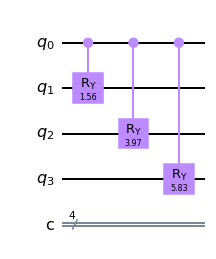

In [3]:
import qiskit
entangled_circuit.quanvolutional(qiskit.QuantumCircuit(4,4)).draw('mpl')

In [4]:
def create_stargraph_ansatz(qc: qiskit.QuantumCircuit, thetas: np.ndarray, num_layers: int):
    """Create star graph ansatz

    Args:
        - qc (qiskit.QuantumCircuit): init circuit
        - thetas (np.ndarray): parameters

    Returns:
        - qiskit.QuantumCircuit: init circuit
    """
    n = qc.num_qubits
    if len(thetas) != num_layers*(2*n - 2):
        raise ValueError(
            'The number of parameter must be num_layers * (2 * n - 2)')

    j = 0
    for l in range(0, num_layers, 1):
        for i in range(0, n):
            qc.ry(thetas[j], i)
            j += 1
        qc.cz(0, 1)
        for i in range(2, n):
            qc.ry(thetas[j], 0)
            j += 1
            qc.cz(0, i)
    return qc

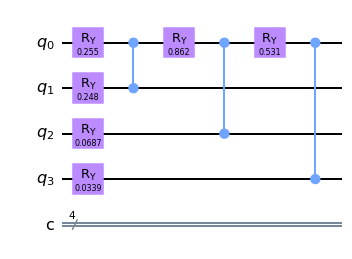

In [6]:
create_stargraph_ansatz(qiskit.QuantumCircuit(4,4), np.random.uniform(0, 1, (2 * 4 - 2)), 1).draw('mpl')